In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path = '/mnt/d/Documents/summary_avg_rattlesnakes.csv'
df = pd.read_csv(path, index_col=0)
df.head()

,Study_Site,Experiment,Year,Month,Day,Avg_Rattlesnakes
0,Canada,0,2000,6,1,300.000000
1,Canada,0,2000,6,2,299.891667
2,Canada,0,2000,6,3,300.466667
3,Canada,0,2000,6,4,301.341667
4,Canada,0,2000,6,5,301.508333


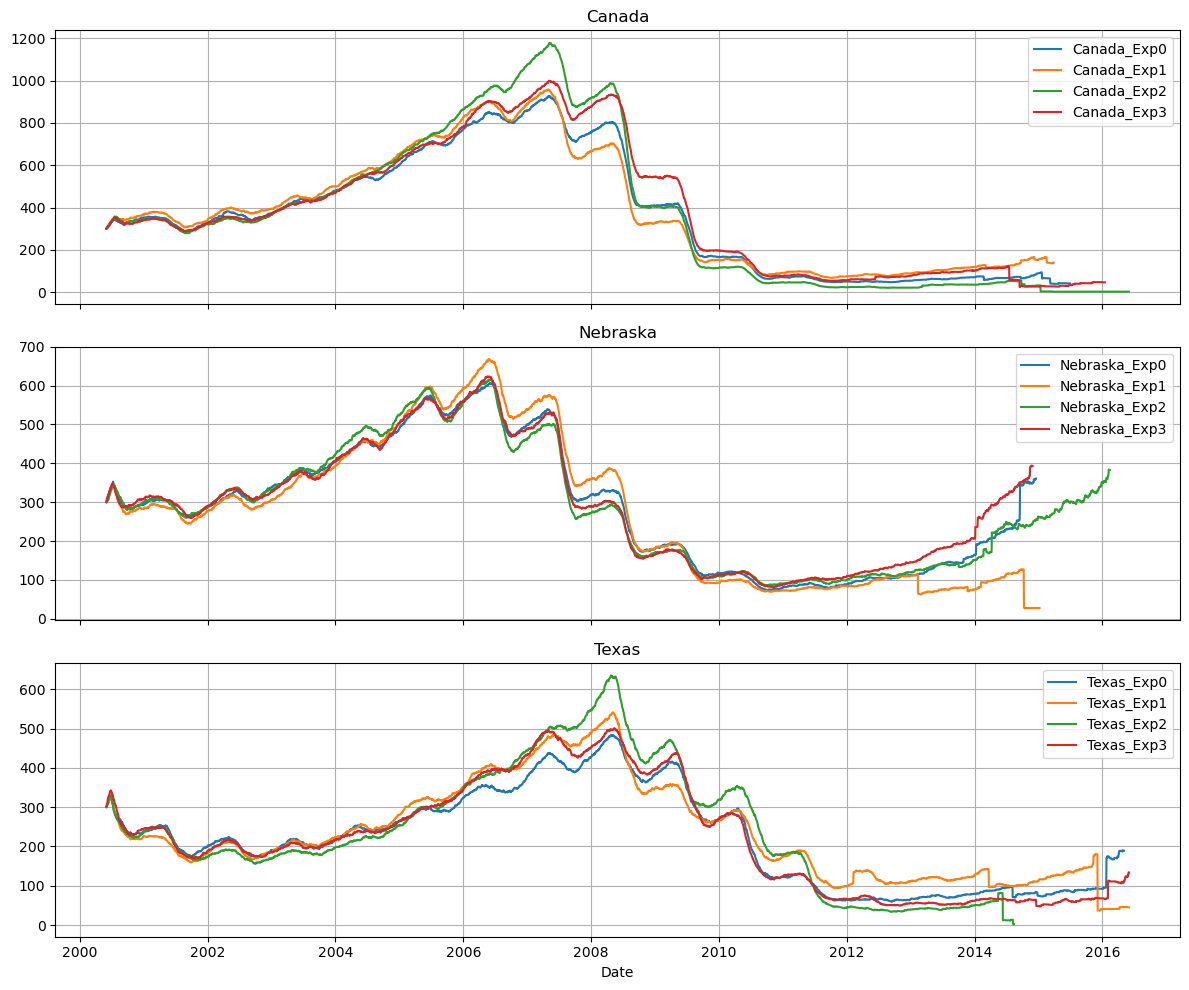

In [6]:
# Combine into datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Create a unique ID per site/experiment combo
df['Site_Exp'] = df['Study_Site'] + '_Exp' + df['Experiment'].astype(str)

# Sort by Date just in case
df = df.sort_values(by='Date')

# Plot


sites = df['Study_Site'].unique()
fig, axes = plt.subplots(nrows=3, figsize=(12, 10), sharex=True)

for i, site in enumerate(sites):
    ax = axes[i]
    site_df = df[df['Study_Site'] == site]
    for key, group in site_df.groupby('Site_Exp'):
        ax.plot(group['Date'], group['Avg_Rattlesnakes'], label=key)
    ax.set_title(site)
    ax.legend()
    ax.grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()
